# Libraries and Packages

In [1]:
import re
import pandas as pd 
pd.set_option('display.max_columns', None) 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Working Directory

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# File path set and defined to Google Drive where the retail sales data is stored for training
file_path = '/content/drive/MyDrive/datasets/'

# Load Data

In [16]:
# read Family_Income file for Family_Income
df11 = pd.read_excel(file_path + 'Family_Income.xlsx')
df11.columns = ['StudentID', 'Family_Income']
display(df11.head(), df11.shape)

,StudentID,Family_Income
0,1,109770.95
1,2,58442.99
2,3,97125.87
3,4,55256.40
4,5,58187.16


(1000, 2)

In [19]:
# change the datatype of StudentID to int
df11['StudentID'] = df11['StudentID'].astype(int)

# change the datatype of Family_Income to float
df11['Family_Income'] = df11['Family_Income'].astype(float)

In [20]:
# Parents_Education file for Parent_Education_Level
df12 = pd.read_excel(file_path + 'Parents_Education.xlsx')
df12.columns = ['StudentID', 'Parent_Education_Level']
display(df12.head(), df12.shape)

,StudentID,Parent_Education_Level
0,1,Bachelor's
1,2,Doctorate
2,3,HS or Lower
3,4,Master's
4,5,Master's


(1000, 2)

In [21]:
# change the datatype of StudentID to int
df12['StudentID'] = df12['StudentID'].astype(int)

In [23]:
# read CreditRating Data 2012.xlsx for Credit_Score_Raw and Credit_Score_AgeAdj
df13 = pd.read_excel(file_path + 'CreditRating Data 2012.xlsx')
df13.columns = ['StudentID', 'Credit_Score_Raw', 'Credit_Score_AgeAdj']
display(df13.head(), df13.shape)

,StudentID,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,0.495227,0.767967
1,2,0.987649,0.529815
2,3,0.249315,0.589539
3,4,0.653183,0.805702
4,5,0.273099,0.415433


(1000, 3)

In [31]:
# change the datatype of StudentID to int
df13['StudentID'] = df13['StudentID'].astype(int)

# change the datatype of Credit_Score_Raw, Credit_Score_AgeAdj to float
df13['Credit_Score_Raw'] = df13['Credit_Score_Raw'].astype(float)
df13['Credit_Score_AgeAdj'] = df13['Credit_Score_AgeAdj'].astype(float)

In [25]:
# read LoanAmount.xlsx for Loan_Amount
df14 = pd.read_excel(file_path + 'LoanAmount.xlsx')
df14.columns = ['StudentID', 'Loan_Amount']
display(df14.head(), df14.shape)

,StudentID,Loan_Amount
0,1,19861
1,2,17391
2,3,8118
3,4,18905
4,5,16175


(1000, 2)

In [26]:
# change the datatype of StudentID and Loan_Amount to int
df14['StudentID'] = df14['StudentID'].astype(int)
df14['Loan_Amount'] = df14['Loan_Amount'].astype(int)


In [27]:
# read HS_Academics 2012.xlsx for HS_Math, HS_Science, HS_English
df15 = pd.read_excel(file_path + 'HS_Academics 2012.xlsx')
df15.columns = ['StudentID', 'HS_Math', 'HS_Science', 'HS_English']
display(df15.head(), df15.shape)

,StudentID,HS_Math,HS_Science,HS_English
0,1,10,10,10.0
1,2,9,9,10.0
2,3,9,6,6.0
3,4,10,9,9.0
4,5,6,8,5.0


(1000, 4)

In [28]:
# change the datatype of StudentID to int
df15['StudentID'] = df15['StudentID'].astype(int)

# change the datatype of HS_Math, HS_Science, HS_English to float
df15['HS_Math'] = df15['HS_Math'].astype(float)
df15['HS_Science'] = df15['HS_Science'].astype(float)
df15['HS_English'] = df15['HS_English'].astype(float)


# Describe Data (Metadata)

In [29]:
# Create a metadata dataframe that contains information about the input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [32]:
# Describe df1 df2 df3 df4 df5 by usng metadata function
display(metadata(df11), metadata(df12), metadata(df13), metadata(df14), metadata(df15))

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int64,0,0.0,1000,100.0,1.00,1000.00,288.819436
1,Family_Income,float64,0,0.0,1000,100.0,35074.29,114967.96,22725.869857


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int64,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Parent_Education_Level,object,0,0.0,7,0.7,NaN,NaN,NaN


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int64,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,Credit_Score_Raw,float64,0,0.0,996,99.6,0.000735,1.000000,0.235416
2,Credit_Score_AgeAdj,float64,0,0.0,1000,100.0,0.045899,0.985665,0.196417


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int64,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Loan_Amount,int64,0,0.0,912,91.2,5847.0,19992.0,3613.024754


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int64,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,HS_Math,float64,0,0.0,9,0.9,2.0,10.0,1.683583
2,HS_Science,float64,0,0.0,8,0.8,3.0,10.0,1.590361
3,HS_English,float64,16,1.6,9,0.9,2.0,10.0,1.563881


1. No missing values except for HS_English in the academics file.
2. Very low amount of unique values in df12 and df15, we will need to aggregate data.
3. For those dataframe with less than 1000 unique values, we need to use left join to merge them with the dataframe with 1000 unique values. And then mark the missing values as 0 or something else.

# Data Exploration

In [33]:
# Perform exploratory data analysis on a specified column in a DataFrame, displaying basic statistics and visualizations.
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    else:
        mean = df[column].mean() # mean
        std_dev = df[column].std() # standard deviation
        # Calculate interquartile range (IQR)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1 # interquartile range
        outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr) # outlier range
        outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
        outliers = outliers[column].values # outlier values

        print(f"Mean of {column}: {mean:.2f}")
        print(f"Standard deviation of {column}: {std_dev:.2f}")
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("Outliers values:")
        print(outliers)

        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f"Box plot of {column}") # Box plot
        plt.show()

        if df[column].nunique() >= 10:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
            plt.title(f"Histogram of {column}")
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.show()

Mean of Family_Income: 75443.84
Standard deviation of Family_Income: 22725.87
Number of outliers in Family_Income: 0
Outliers values:
[]


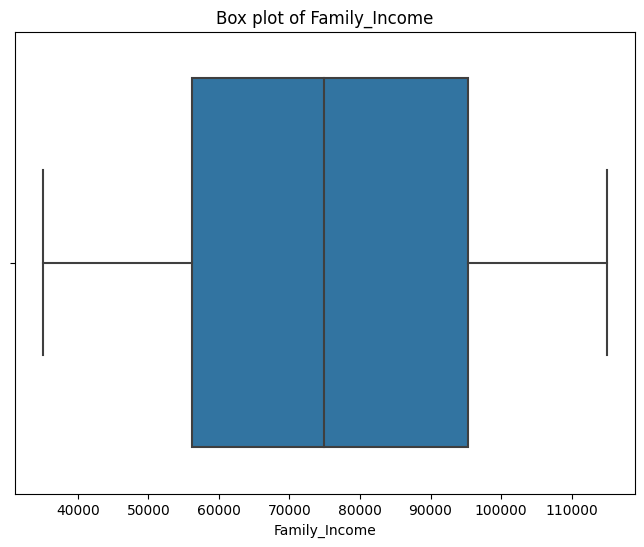

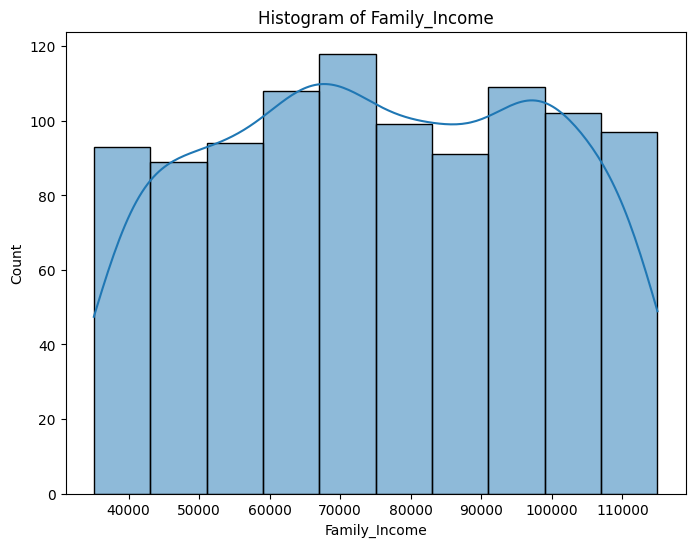

In [34]:
# Perform data exploration on df11 df12 df13 df14 df15
data_exploration(df11, 'Family_Income') 

Counts and percentages of unique values in Parent_Education_Level:

                   Count  Percentage
Doctorate            304        30.4
Bachelor's           301        30.1
HS or Lower          284        28.4
Master's             107        10.7
VERY HS or Lower       2         0.2
 VERY HS or Lower      1         0.1
GREAT                  1         0.1


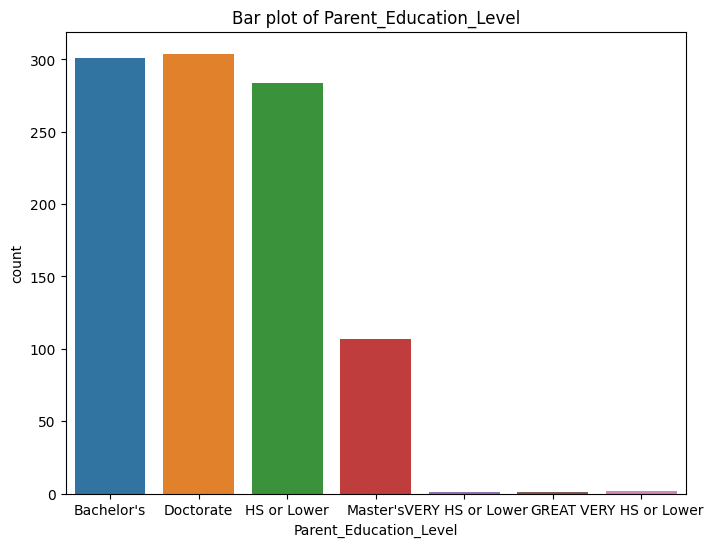

In [35]:
data_exploration(df12, 'Parent_Education_Level') # Bachelor, Doctorate, and HS or Lower hold about a third each of the data.

Mean of Credit_Score_Raw: 0.46
Standard deviation of Credit_Score_Raw: 0.24
Number of outliers in Credit_Score_Raw: 0
Outliers values:
[]


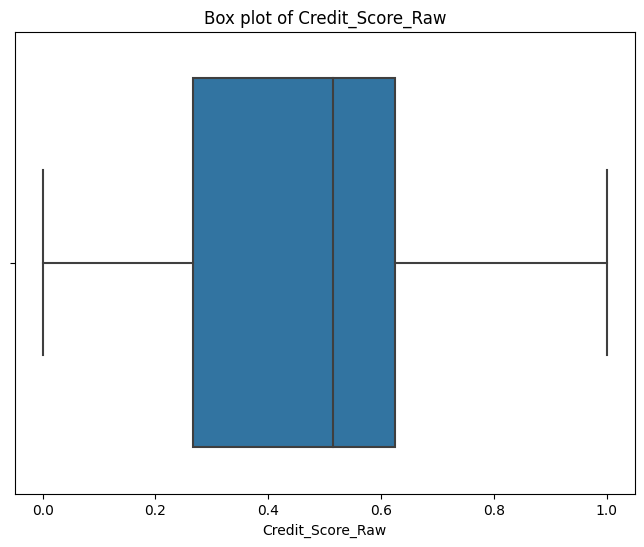

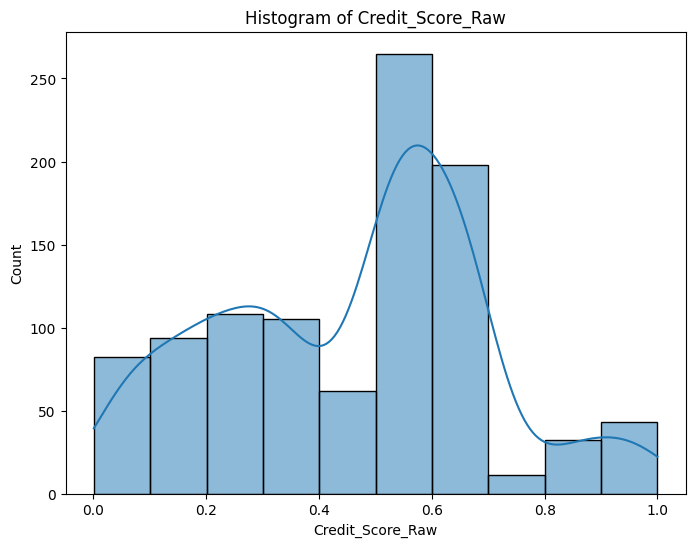

In [36]:
data_exploration(df13, 'Credit_Score_Raw') 

Mean of Credit_Score_AgeAdj: 0.55
Standard deviation of Credit_Score_AgeAdj: 0.20
Number of outliers in Credit_Score_AgeAdj: 0
Outliers values:
[]


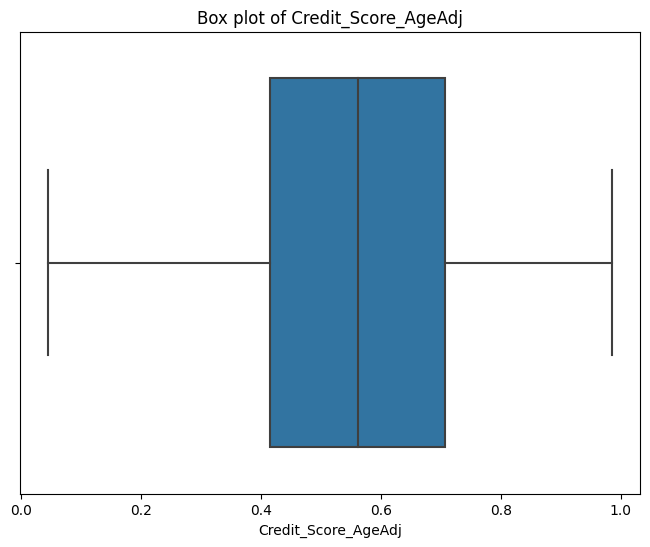

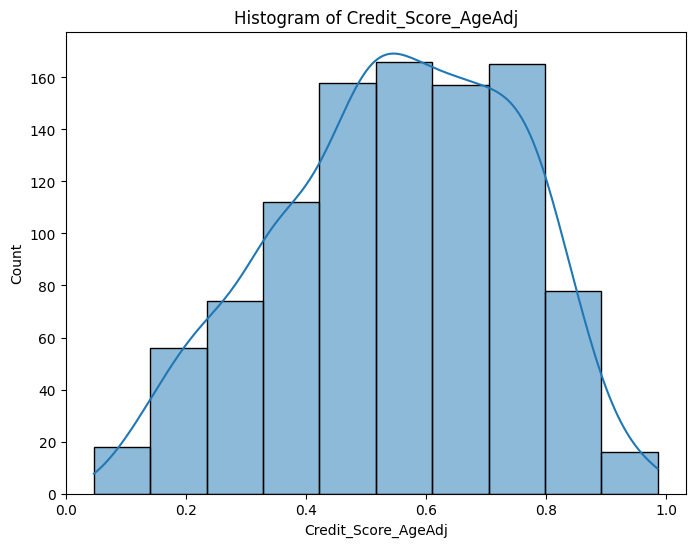

In [37]:
data_exploration(df13, 'Credit_Score_AgeAdj') 

Mean of Loan_Amount: 16859.18
Standard deviation of Loan_Amount: 3613.02
Number of outliers in Loan_Amount: 136
Outliers values:
[8118 6277 6969 7883 8430 8847 7820 8894 7819 7618 8448 8352 8145 8663
 8625 8455 8067 8306 9300 9281 9489 8654 8488 8790 5847 8309 8299 8020
 9042 9287 8851 8680 8434 8622 7984 8196 7776 9149 8429 8233 8661 7776
 8245 9334 7825 6306 7022 8347 8024 7954 8206 6850 8245 8947 8799 8757
 6620 9183 9411 8604 8963 9374 9473 8515 8930 8694 8686 8004 7541 9380
 7623 8047 7142 8014 8499 7879 9097 8140 8765 9393 6836 8918 9174 8479
 7989 8514 8914 8051 9099 9124 8786 7847 8392 7026 9017 7433 7655 7072
 6281 7846 7723 7380 7868 7581 8321 7506 8287 8268 9334 8934 7785 9487
 6053 7784 7870 9463 8474 9220 9003 7557 6323 8404 8279 8755 8137 8628
 7727 7694 9058 7830 7687 8509 8212 9299 8691 6178]


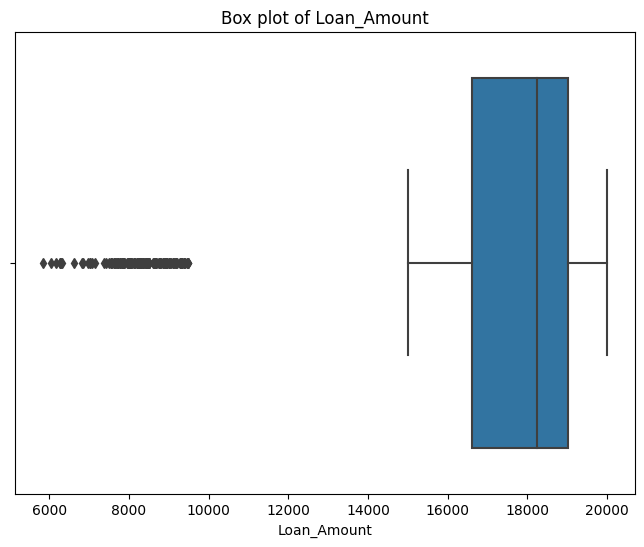

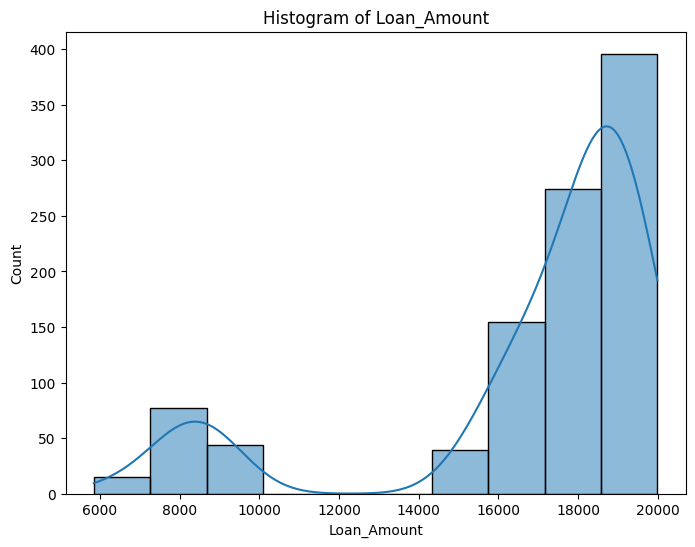

In [39]:
data_exploration(df14, 'Loan_Amount') # There are a ton of outliers in Loan_Amount

Mean of HS_Math: 8.13
Standard deviation of HS_Math: 1.68
Number of outliers in HS_Math: 3
Outliers values:
[2. 2. 2.]


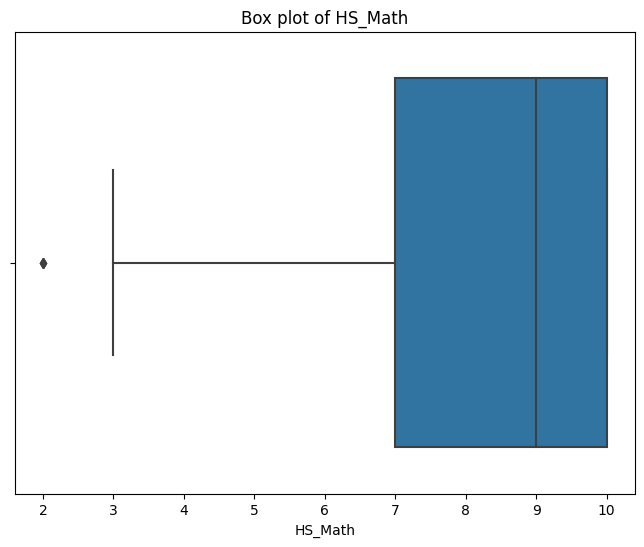

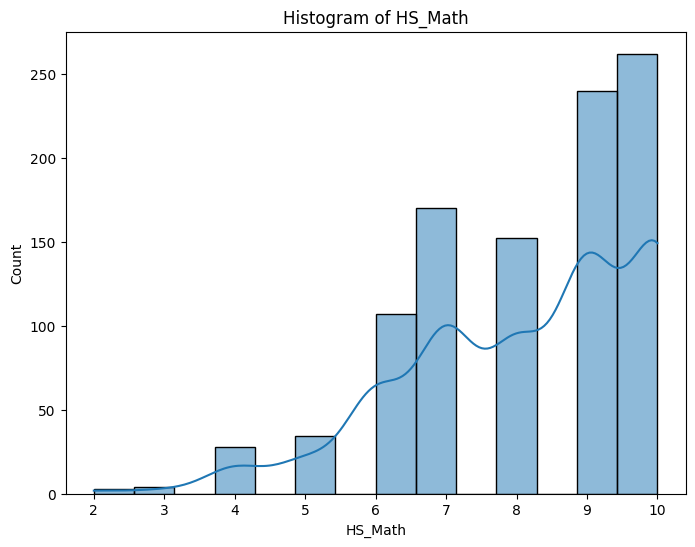

In [40]:
data_exploration(df15, 'HS_Math') # One outlier in Math.

Mean of HS_English: 8.11
Standard deviation of HS_English: 1.56
Number of outliers in HS_English: 6
Outliers values:
[3. 3. 2. 3. 3. 3.]


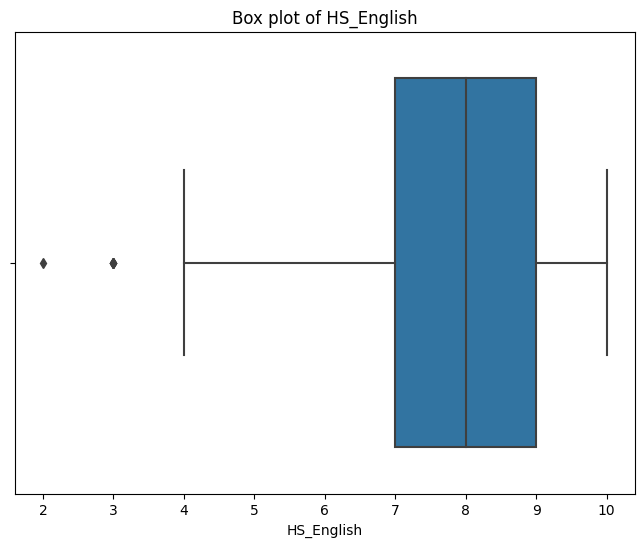

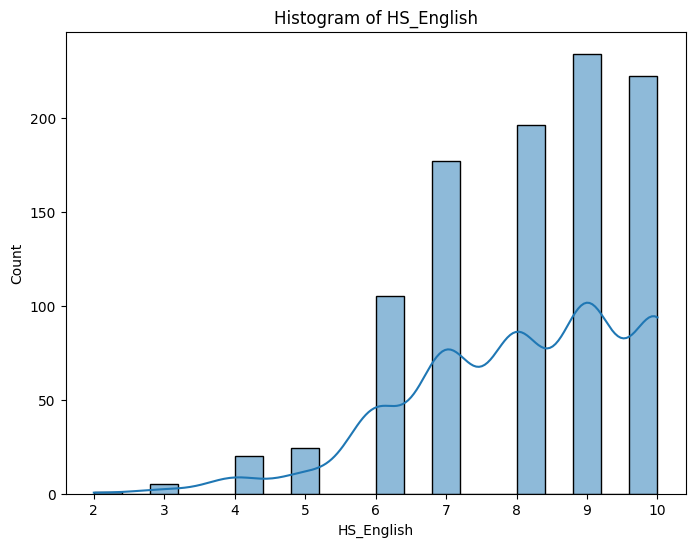

In [44]:
data_exploration(df15, 'HS_English') # There are two outliers in English

Mean of HS_Science: 8.09
Standard deviation of HS_Science: 1.59
Number of outliers in HS_Science: 5
Outliers values:
[3. 3. 3. 3. 3.]


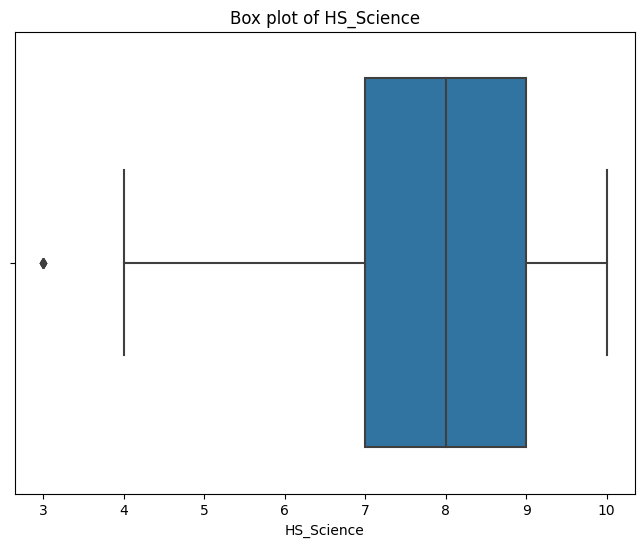

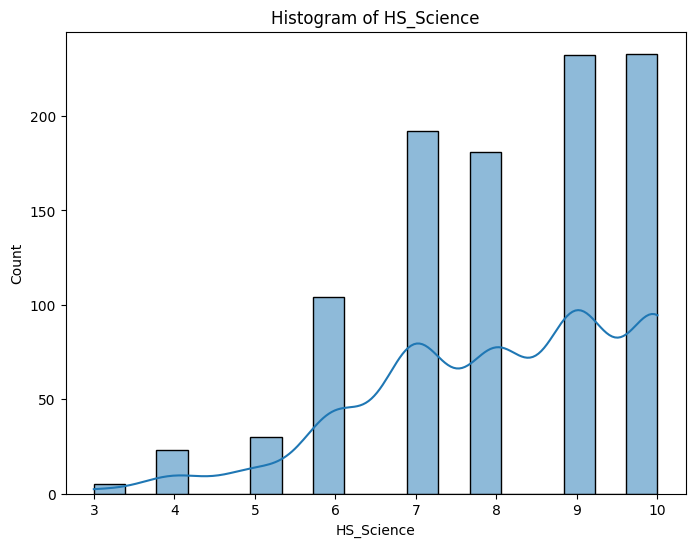

In [43]:
data_exploration(df15, 'HS_Science') # One outlier in Science